In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime as dt

In [2]:
df = pd.read_csv('regression_w_l_c.csv')

In [3]:
df

,LapNumber,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Rainfall,Year,DriverNumber,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,1.0,25.70,51.0,1015.65,33.75,193.0,0.70,1.0,2018,10,...,True,Toro Rosso,0 days 00:06:47.319000,NaN,2,10.0,False,NaN,False,False
1,2.0,26.00,50.7,1015.60,33.90,181.0,0.60,1.0,2018,10,...,False,Toro Rosso,0 days 00:08:19.100000,NaN,21,10.0,False,NaN,False,True
2,3.0,26.00,50.7,1015.60,33.90,181.0,0.60,1.0,2018,10,...,False,Toro Rosso,0 days 00:09:39.719000,NaN,1,10.0,False,NaN,False,True
3,4.0,26.10,50.0,1015.60,33.90,283.0,1.00,1.0,2018,10,...,False,Toro Rosso,0 days 00:10:59.531000,NaN,1,10.0,False,NaN,False,True
4,5.0,26.60,48.6,1015.60,33.60,232.0,1.65,2.0,2018,10,...,False,Toro Rosso,0 days 00:12:19.093000,NaN,1,10.0,False,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,21.60,61.5,1018.40,40.50,211.5,0.70,0.0,2024,24,...,True,Kick Sauber,0 days 03:12:48.585000,NaN,1,16.0,False,NaN,False,True
8307,73.0,21.70,61.0,1018.40,40.80,293.0,1.10,0.0,2024,24,...,True,Kick Sauber,0 days 03:14:09.170000,NaN,1,16.0,False,NaN,False,True
8308,74.0,21.70,61.0,1018.40,40.80,214.0,0.70,0.0,2024,24,...,True,Kick Sauber,0 days 03:15:24.403000,NaN,1,16.0,False,NaN,False,True
8309,75.0,21.70,61.0,1018.40,40.60,353.0,0.60,0.0,2024,24,...,True,Kick Sauber,0 days 03:16:44.876000,NaN,1,16.0,False,NaN,False,True


In [4]:
df.columns

Index(['LapNumber', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Rainfall', 'Year', 'DriverNumber', 'RPM',
       'nGear', 'Throttle', 'Brake', 'DRS', 'Time', 'Driver', 'LapTime',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [5]:
df.drop(['AirTemp', 'Humidity', 'Pressure',
       'WindDirection', 'WindSpeed', 'Rainfall', 'Time', 'Driver', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'Team', 'LapStartTime', 'LapStartDate', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'], axis=1, inplace=True)

In [6]:
df

,LapNumber,TrackTemp,Year,DriverNumber,RPM,nGear,Throttle,Brake,DRS,LapTime,Stint,PitOutTime,PitInTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus
0,1.0,33.75,2018,10,9531.494048,3.413690,46.101190,99,0,0 days 00:01:31.614000,NaN,NaN,NaN,False,NaN,NaN,True,2
1,2.0,33.90,2018,10,9394.374251,3.592814,47.080838,93,16,0 days 00:01:20.619000,1.0,NaN,NaN,True,HYPERSOFT,6.0,False,21
2,3.0,33.90,2018,10,9429.505952,3.583333,48.086310,89,24,0 days 00:01:19.812000,1.0,NaN,NaN,True,HYPERSOFT,7.0,False,1
3,4.0,33.90,2018,10,9437.838906,3.589666,47.723404,85,22,0 days 00:01:19.562000,1.0,NaN,NaN,True,HYPERSOFT,8.0,False,1
4,5.0,33.60,2018,10,9427.572727,3.600000,46.830303,92,19,0 days 00:01:19.400000,1.0,NaN,NaN,True,HYPERSOFT,9.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,40.50,2024,24,9382.875887,3.932624,50.872340,90,0,0 days 00:01:20.585000,3.0,NaN,NaN,False,SOFT,2.0,True,1
8307,73.0,40.80,2024,24,8971.025559,3.750799,43.853035,102,0,0 days 00:01:15.233000,3.0,NaN,NaN,True,SOFT,3.0,True,1
8308,74.0,40.80,2024,24,9461.837545,4.014440,52.931408,85,0,0 days 00:01:20.473000,3.0,NaN,NaN,False,SOFT,4.0,True,1
8309,75.0,40.60,2024,24,9103.670175,3.870175,47.568421,88,0,0 days 00:01:14.718000,3.0,NaN,NaN,True,SOFT,5.0,True,1


In [7]:
df.dtypes

LapNumber         float64
TrackTemp         float64
Year                int64
DriverNumber        int64
RPM               float64
nGear             float64
Throttle          float64
Brake               int64
DRS                 int64
LapTime            object
Stint             float64
PitOutTime         object
PitInTime          object
IsPersonalBest       bool
Compound           object
TyreLife          float64
FreshTyre            bool
TrackStatus         int64
dtype: object

In [8]:
df[(df["PitInTime"].notna()) | (df["PitOutTime"].notna())][['Year', 'DriverNumber', 'LapNumber', 'Stint', 'PitInTime', 'PitOutTime', 'LapTime']]

,Year,DriverNumber,LapNumber,Stint,PitInTime,PitOutTime,LapTime
36,2018,10,37.0,1.0,0 days 00:55:41.127000,NaN,0 days 00:01:36.516000
37,2018,10,38.0,2.0,NaN,0 days 00:56:05.315000,0 days 00:01:20.582000
98,2018,11,21.0,1.0,0 days 00:34:40.650000,NaN,0 days 00:01:40.898000
99,2018,11,22.0,2.0,NaN,0 days 00:35:09.919000,0 days 00:01:21.571000
174,2018,14,19.0,1.0,0 days 00:31:55.075000,NaN,0 days 00:01:36.370000
...,...,...,...,...,...,...,...
8216,2024,2,58.0,3.0,NaN,0 days 02:54:03.280000,0 days 00:01:19.809000
8235,2024,24,1.0,1.0,0 days 00:57:26.533000,NaN,0 days 00:42:06.253000
8236,2024,24,2.0,2.0,NaN,0 days 01:37:13.050000,0 days 00:01:52.131000
8304,2024,24,70.0,2.0,0 days 03:10:59.688000,NaN,0 days 00:01:40.898000


In [9]:
# Initialize column with NaT
df["PitDuration"] = pd.NaT

# Ensure PitInTime and PitOutTime are timedelta
df["PitInTime"] = pd.to_timedelta(df["PitInTime"])
df["PitOutTime"] = pd.to_timedelta(df["PitOutTime"])

# Iterate over rows with PitInTime notna (i.e., where the car entered the pits)
for idx, row in df[df["PitInTime"].notna()].iterrows():
    # Search for the next row for the same driver and year with PitOutTime notna
    mask = (
        (df["Year"] == row["Year"]) &
        (df["DriverNumber"] == row["DriverNumber"]) &
        (df["PitOutTime"].notna()) &
        (df.index > idx)
    )
    next_pit_out = df[mask].head(1)

    if not next_pit_out.empty:
        out_time = next_pit_out["PitOutTime"].values[0]
        df.at[idx, "PitDuration"] = out_time - row["PitInTime"]

/var/folders/b0/f1pz01h9011b7dyg_fzzzdwm0000gn/T/ipykernel_4459/1518564104.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.188000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[idx, "PitDuration"] = out_time - row["PitInTime"]


In [10]:
# View result
df[(df["PitInTime"].notna()) | (df["PitOutTime"].notna())][['DriverNumber', 'LapNumber', 'Stint', 'PitInTime', 'PitOutTime', 'PitDuration', 'LapTime']]


,DriverNumber,LapNumber,Stint,PitInTime,PitOutTime,PitDuration,LapTime
36,10,37.0,1.0,0 days 00:55:41.127000,NaT,0 days 00:00:24.188000,0 days 00:01:36.516000
37,10,38.0,2.0,NaT,0 days 00:56:05.315000,NaT,0 days 00:01:20.582000
98,11,21.0,1.0,0 days 00:34:40.650000,NaT,0 days 00:00:29.269000,0 days 00:01:40.898000
99,11,22.0,2.0,NaT,0 days 00:35:09.919000,NaT,0 days 00:01:21.571000
174,14,19.0,1.0,0 days 00:31:55.075000,NaT,0 days 00:00:24.268000,0 days 00:01:36.370000
...,...,...,...,...,...,...,...
8216,2,58.0,3.0,NaT,0 days 02:54:03.280000,NaT,0 days 00:01:19.809000
8235,24,1.0,1.0,0 days 00:57:26.533000,NaT,0 days 00:39:46.517000,0 days 00:42:06.253000
8236,24,2.0,2.0,NaT,0 days 01:37:13.050000,NaT,0 days 00:01:52.131000
8304,24,70.0,2.0,0 days 03:10:59.688000,NaT,0 days 00:00:24.448000,0 days 00:01:40.898000


In [11]:
df

,LapNumber,TrackTemp,Year,DriverNumber,RPM,nGear,Throttle,Brake,DRS,LapTime,Stint,PitOutTime,PitInTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,PitDuration
0,1.0,33.75,2018,10,9531.494048,3.413690,46.101190,99,0,0 days 00:01:31.614000,NaN,NaT,NaT,False,NaN,NaN,True,2,NaN
1,2.0,33.90,2018,10,9394.374251,3.592814,47.080838,93,16,0 days 00:01:20.619000,1.0,NaT,NaT,True,HYPERSOFT,6.0,False,21,NaN
2,3.0,33.90,2018,10,9429.505952,3.583333,48.086310,89,24,0 days 00:01:19.812000,1.0,NaT,NaT,True,HYPERSOFT,7.0,False,1,NaN
3,4.0,33.90,2018,10,9437.838906,3.589666,47.723404,85,22,0 days 00:01:19.562000,1.0,NaT,NaT,True,HYPERSOFT,8.0,False,1,NaN
4,5.0,33.60,2018,10,9427.572727,3.600000,46.830303,92,19,0 days 00:01:19.400000,1.0,NaT,NaT,True,HYPERSOFT,9.0,False,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,40.50,2024,24,9382.875887,3.932624,50.872340,90,0,0 days 00:01:20.585000,3.0,NaT,NaT,False,SOFT,2.0,True,1,NaN
8307,73.0,40.80,2024,24,8971.025559,3.750799,43.853035,102,0,0 days 00:01:15.233000,3.0,NaT,NaT,True,SOFT,3.0,True,1,NaN
8308,74.0,40.80,2024,24,9461.837545,4.014440,52.931408,85,0,0 days 00:01:20.473000,3.0,NaT,NaT,False,SOFT,4.0,True,1,NaN
8309,75.0,40.60,2024,24,9103.670175,3.870175,47.568421,88,0,0 days 00:01:14.718000,3.0,NaT,NaT,True,SOFT,5.0,True,1,NaN


In [12]:
df.Compound.value_counts()

Compound
HARD            3302
MEDIUM          1987
SOFT             919
SUPERSOFT        583
ULTRASOFT        580
INTERMEDIATE     526
HYPERSOFT        329
WET               64
Name: count, dtype: int64

In [13]:
compound_order = {
    "HYPERSOFT": 1,
    "ULTRASOFT": 2,
    "SUPERSOFT": 3,
    "SOFT": 4,
    "MEDIUM": 5,
    "HARD": 6,
    "INTERMEDIATE": 7,
    "WET": 8
}

df["Compound"] = df["Compound"].map(compound_order)

In [14]:
df.Compound.value_counts()

Compound
6.0    3302
5.0    1987
4.0     919
3.0     583
2.0     580
7.0     526
1.0     329
8.0      64
Name: count, dtype: int64

In [15]:
df.columns

Index(['LapNumber', 'TrackTemp', 'Year', 'DriverNumber', 'RPM', 'nGear',
       'Throttle', 'Brake', 'DRS', 'LapTime', 'Stint', 'PitOutTime',
       'PitInTime', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
       'TrackStatus', 'PitDuration'],
      dtype='object')

In [16]:
df.drop(['LapNumber', 'Year', 'DriverNumber', 'Stint', 'PitInTime', 'PitOutTime'], axis=1, inplace=True)

In [17]:
df

,TrackTemp,RPM,nGear,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,PitDuration
0,33.75,9531.494048,3.413690,46.101190,99,0,0 days 00:01:31.614000,False,NaN,NaN,True,2,NaN
1,33.90,9394.374251,3.592814,47.080838,93,16,0 days 00:01:20.619000,True,1.0,6.0,False,21,NaN
2,33.90,9429.505952,3.583333,48.086310,89,24,0 days 00:01:19.812000,True,1.0,7.0,False,1,NaN
3,33.90,9437.838906,3.589666,47.723404,85,22,0 days 00:01:19.562000,True,1.0,8.0,False,1,NaN
4,33.60,9427.572727,3.600000,46.830303,92,19,0 days 00:01:19.400000,True,1.0,9.0,False,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,40.50,9382.875887,3.932624,50.872340,90,0,0 days 00:01:20.585000,False,4.0,2.0,True,1,NaN
8307,40.80,8971.025559,3.750799,43.853035,102,0,0 days 00:01:15.233000,True,4.0,3.0,True,1,NaN
8308,40.80,9461.837545,4.014440,52.931408,85,0,0 days 00:01:20.473000,False,4.0,4.0,True,1,NaN
8309,40.60,9103.670175,3.870175,47.568421,88,0,0 days 00:01:14.718000,True,4.0,5.0,True,1,NaN


In [18]:
df.dtypes

TrackTemp         float64
RPM               float64
nGear             float64
Throttle          float64
Brake               int64
DRS                 int64
LapTime            object
IsPersonalBest       bool
Compound          float64
TyreLife          float64
FreshTyre            bool
TrackStatus         int64
PitDuration        object
dtype: object

In [19]:
df["FreshTyre"] = df["FreshTyre"].astype(int)
df["IsPersonalBest"] = df["IsPersonalBest"].astype(int)

In [20]:
df["LapTime"] = pd.to_timedelta(df["LapTime"]).dt.total_seconds()
df["PitDuration"] = pd.to_timedelta(df["PitDuration"]).dt.total_seconds()

In [21]:
df

,TrackTemp,RPM,nGear,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,PitDuration
0,33.75,9531.494048,3.413690,46.101190,99,0,91.614,0,NaN,NaN,1,2,NaN
1,33.90,9394.374251,3.592814,47.080838,93,16,80.619,1,1.0,6.0,0,21,NaN
2,33.90,9429.505952,3.583333,48.086310,89,24,79.812,1,1.0,7.0,0,1,NaN
3,33.90,9437.838906,3.589666,47.723404,85,22,79.562,1,1.0,8.0,0,1,NaN
4,33.60,9427.572727,3.600000,46.830303,92,19,79.400,1,1.0,9.0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,40.50,9382.875887,3.932624,50.872340,90,0,80.585,0,4.0,2.0,1,1,NaN
8307,40.80,8971.025559,3.750799,43.853035,102,0,75.233,1,4.0,3.0,1,1,NaN
8308,40.80,9461.837545,4.014440,52.931408,85,0,80.473,0,4.0,4.0,1,1,NaN
8309,40.60,9103.670175,3.870175,47.568421,88,0,74.718,1,4.0,5.0,1,1,NaN


In [22]:
df.to_csv('regression_final.csv', index=False)

In [23]:
df = pd.read_csv('regression_final.csv')

In [24]:
df

,TrackTemp,RPM,nGear,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,PitDuration
0,33.75,9531.494048,3.413690,46.101190,99,0,91.614,0,NaN,NaN,1,2,NaN
1,33.90,9394.374251,3.592814,47.080838,93,16,80.619,1,1.0,6.0,0,21,NaN
2,33.90,9429.505952,3.583333,48.086310,89,24,79.812,1,1.0,7.0,0,1,NaN
3,33.90,9437.838906,3.589666,47.723404,85,22,79.562,1,1.0,8.0,0,1,NaN
4,33.60,9427.572727,3.600000,46.830303,92,19,79.400,1,1.0,9.0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,40.50,9382.875887,3.932624,50.872340,90,0,80.585,0,4.0,2.0,1,1,NaN
8307,40.80,8971.025559,3.750799,43.853035,102,0,75.233,1,4.0,3.0,1,1,NaN
8308,40.80,9461.837545,4.014440,52.931408,85,0,80.473,0,4.0,4.0,1,1,NaN
8309,40.60,9103.670175,3.870175,47.568421,88,0,74.718,1,4.0,5.0,1,1,NaN


In [25]:
# Remove rows with Red Flag (code '5')
df = df[~df["TrackStatus"].astype(str).str.contains("5")].copy()

# Define a function to map status codes to labels
def map_status(status_str):
    status_str = str(status_str)
    if "4" in status_str:
        return 3 #"SC"
    elif "6" in status_str:
        return 2 #"VSC"
    elif "2" in status_str:
        return 1 #"YF"
    else:
        return 0 #"AC"  # All Clear

In [26]:
df["TrackStatus"] = df["TrackStatus"].apply(map_status)

In [27]:
df.isnull().sum()

TrackTemp            5
RPM                  0
nGear                0
Throttle             0
Brake                0
DRS                  0
LapTime              0
IsPersonalBest       0
Compound            21
TyreLife            21
FreshTyre            0
TrackStatus          0
PitDuration       8151
dtype: int64

In [28]:
df.dtypes

TrackTemp         float64
RPM               float64
nGear             float64
Throttle          float64
Brake               int64
DRS                 int64
LapTime           float64
IsPersonalBest      int64
Compound          float64
TyreLife          float64
FreshTyre           int64
TrackStatus         int64
PitDuration       float64
dtype: object

In [29]:
df.drop(['LapTime'], axis=1).corr()

,TrackTemp,RPM,nGear,Throttle,Brake,DRS,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,PitDuration
TrackTemp,1.000000,0.160216,0.323220,0.199422,-0.038375,0.160419,0.061102,-0.055083,0.086054,-0.221227,-0.148605,-0.144982
RPM,0.160216,1.000000,0.713899,0.543516,-0.390970,0.074208,0.034591,-0.164011,0.040388,-0.056346,-0.271126,-0.311130
nGear,0.323220,0.713899,1.000000,0.678514,-0.255532,0.129358,-0.016918,-0.228654,0.114857,-0.096818,-0.419281,-0.273728
Throttle,0.199422,0.543516,0.678514,1.000000,0.184841,0.039110,-0.019581,-0.241335,0.154700,-0.056812,-0.399073,-0.342219
Brake,-0.038375,-0.390970,-0.255532,0.184841,1.000000,-0.013706,-0.003966,0.023829,-0.012937,0.009476,0.018764,0.296513
DRS,0.160419,0.074208,0.129358,0.039110,-0.013706,1.000000,-0.017443,0.009098,-0.001574,-0.055876,-0.085710,0.021016
IsPersonalBest,0.061102,0.034591,-0.016918,-0.019581,-0.003966,-0.017443,1.000000,0.038666,-0.234459,-0.106947,-0.056996,NaN
Compound,-0.055083,-0.164011,-0.228654,-0.241335,0.023829,0.009098,0.038666,1.000000,0.018668,0.163196,0.051934,0.177458
TyreLife,0.086054,0.040388,0.114857,0.154700,-0.012937,-0.001574,-0.234459,0.018668,1.000000,-0.075072,-0.153212,-0.244710
FreshTyre,-0.221227,-0.056346,-0.096818,-0.056812,0.009476,-0.055876,-0.106947,0.163196,-0.075072,1.000000,0.025042,0.254994


In [30]:
df.drop("nGear", axis=1, inplace=True)

In [31]:
# Replace nulls in PitDurationSeconds with 0
df["PitDuration"] = df["PitDuration"].fillna(0)

# Replace nulls in TrackTemp with median
df["TrackTemp"] = df["TrackTemp"].fillna(df["TrackTemp"].median())

# Replace nulls in TyreLife with median
df["TyreLife"] = df["TyreLife"].fillna(df["TyreLife"].median())

# Replace nulls in CompoundEncoded with mode
df["Compound"] = df["Compound"].fillna(df["Compound"].mode()[0])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---- Step 1: Define features and target ----
X = df.drop('LapTime', axis=1)
y = df["LapTime"]

# ---- Step 2: Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 3: Scale features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Step 4: Fit linear regression ----
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ---- Step 5: Predict and evaluate ----
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 43.17
Mean Absolute Error (MAE): 3.49
R² Score: 0.6450


In [33]:
from sklearn.preprocessing import PolynomialFeatures

def run_polynomial_regression(X_train, X_test, y_train, y_test, degree):
    # Step 1: Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Step 2: Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Step 3: Predict and evaluate
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nPolynomial Regression (degree {degree})")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")


# ---- Reuse same preprocessing and scaling ----

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run polynomial regression for degrees 2 and 3
run_polynomial_regression(X_train_scaled, X_test_scaled, y_train, y_test, degree=2)
run_polynomial_regression(X_train_scaled, X_test_scaled, y_train, y_test, degree=3)


Polynomial Regression (degree 2)
Mean Squared Error (MSE): 932.87
Mean Absolute Error (MAE): 3.36
R² Score: -6.6710

Polynomial Regression (degree 3)
Mean Squared Error (MSE): 4449037.60
Mean Absolute Error (MAE): 69.67
R² Score: -36583.3598


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---- Step 1: Define features and target ----
X = df.drop('LapTime', axis=1)
y = df["LapTime"]

# ---- Step 2: Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 3: Scale features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Step 4: Train Random Forest Regressor ----
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# ---- Step 5: Predict and evaluate ----
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regression Results:
Mean Squared Error (MSE): 14.28
Mean Absolute Error (MAE): 1.36
R² Score: 0.8826


           Feature  Importance
2         Throttle    0.522828
0        TrackTemp    0.117682
7         TyreLife    0.111493
9      TrackStatus    0.085655
10     PitDuration    0.070725
3            Brake    0.038817
1              RPM    0.024552
6         Compound    0.019799
5   IsPersonalBest    0.003301
8        FreshTyre    0.003141
4              DRS    0.002007


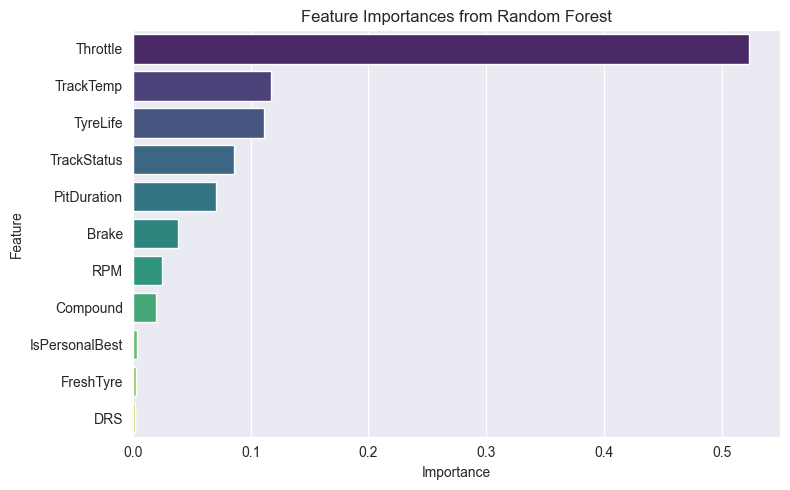

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for easy viewing
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display
print(importance_df)

# Optional: plot it
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

In [36]:
model.feature_importances_

array([0.1176821 , 0.02455233, 0.52282831, 0.03881676, 0.00200727,
       0.00330078, 0.01979879, 0.11149278, 0.00314119, 0.08565476,
       0.07072492])

In [37]:
df.isnull().sum()

TrackTemp         0
RPM               0
Throttle          0
Brake             0
DRS               0
LapTime           0
IsPersonalBest    0
Compound          0
TyreLife          0
FreshTyre         0
TrackStatus       0
PitDuration       0
dtype: int64

In [38]:
df.to_csv('regression_final.csv', index=False)